# <span style="color:blue"> TP de Aprendizagem de Máquina </span>
#### Aluno: Geanderson Esteves dos Santos

In [1]:
# Required packages.
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


In [2]:
# Fix random seed for reproducibility.
seed = 7
np.random.seed(seed)

In [3]:
# Load data.
dataset = np.loadtxt("data_tp1", delimiter=",")
X_train = dataset[:, 1:].reshape(dataset.shape[0],1,28, 28).astype('float32')
y_train = dataset[:,0]
X_test = dataset[:,1:].reshape(dataset.shape[0],1, 28, 28).astype('float32')
y_test = dataset[:,0]

In [4]:
# An image is represented by 28*28 then it is a 784 in memory.
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# Normalize inputs from 0-255 to 0-1.
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
# Define model
def baseline_model(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(unity, input_dim=unity, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Set the gradient
    sgd = optimizers.SGD(lr=learning_rate)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [8]:
# Build the model.
#unity = 50
#learning_rate = 0.5
#model = baseline_model(unity, learning_rate)
# Fit the model
# default batch size was 200
#model.fit(X_train, y_train, validation_data=(X_test, y_test))
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
# Final evaluation of the model
#scores = model.evaluate(X_test, y_test, verbose=2)
#print("Training Error: %.2f%%" % (100-scores[1]*100))

## <span style="color:blue">Testes variando Gradient Descent (GD), Sthocastic Gradient Descent (SGD) e Mini-Batch</span>
### Para não tornar o número de testes muito elevados, ou seja, testar todas as combinações possíveis das variações que as features podem atingir, vamos assumir alguns valores 
### do TP de ML irão ser mantidas em um certo valor, e.g., 
### 1 - Testar o Learning rate para os 3 gradientes deixando o número de unidades fixados no default

In [66]:
# Use the model by parameters.
def use_model(learning_rate, unity, gradient):
    lr = learning_rate
    un = unity
    
    if gradient == 'gd':
        inputsGD.append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=5000, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsGD.append(100-scores[1]*100)
    elif gradient == 'sgd':
        inputsSGD.append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsSGD.append(100-scores[1]*100)
    elif gradient == 'mb10':
        inputsMiniBatch10.append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsMiniBatch10.append(100-scores[1]*100)
    elif gradient == 'mb50':
        inputsMiniBatch50.append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=50, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsMiniBatch50.append(100-scores[1]*100)

In [67]:
inputsGD = []
outputsGD = []
inputsSGD = []
outputsSGD = []
inputsMiniBatch10 = []
outputsMiniBatch10 = []
inputsMiniBatch50 = []
outputsMiniBatch50 = []

In [56]:
def clear_arrays():
    inputsGD = []
    outputsGD = []
    inputsSGD = []
    outputsSGD = []
    inputsMiniBatch10 = []
    outputsMiniBatch10 = []
    inputsMiniBatch50 = []
    outputsMiniBatch50 = []

In [68]:
# GD, lr = 0.5.
use_model(0.5, 50, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 2s 394us/step - loss: 2.3257 - acc: 0.1030 - val_loss: 2.3008 - val_acc: 0.1106
88.94


In [69]:
# GD, lr = 1.
use_model(1, 50, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 2s 301us/step - loss: 2.3152 - acc: 0.0912 - val_loss: 2.3042 - val_acc: 0.1142
88.58


In [70]:
# GD, lr = 10.
use_model(10, 50, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 3s 575us/step - loss: 2.3185 - acc: 0.0920 - val_loss: 4.6407 - val_acc: 0.1000
90.0


In [ ]:
# SGD, lr = 0.5.
use_model(0.5, 50, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 63s 13ms/step - loss: 14.6271 - acc: 0.0922 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 2/10
5000/5000 [==============================] - 54s 11ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 3/10
5000/5000 [==============================] - 50s 10ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 4/10
5000/5000 [==============================] - 51s 10ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 5/10
5000/5000 [==============================] - 48s 10ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 6/10
5000/5000 [==============================] - 56s 11ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 7/10
5000/5000 [==============================] - 61s 12ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - va

In [16]:
# SGD, lr = 1.
use_model(1, 50, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 59s 12ms/step - loss: 14.5068 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
5000/5000 [==============================] - 62s 12ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
5000/5000 [==============================] - 75s 15ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
5000/5000 [==============================] - 76s 15ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
5000/5000 [==============================] - 68s 14ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
5000/5000 [==============================] - 65s 13ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
5000/5000 [==============================] - 58s 12ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - va

In [17]:
# SGD, lr = 10.
use_model(10, 50, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 67s 13ms/step - loss: 14.4680 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 2/10
5000/5000 [==============================] - 52s 10ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 3/10
5000/5000 [==============================] - 49s 10ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 4/10
5000/5000 [==============================] - 51s 10ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 5/10
5000/5000 [==============================] - 42s 8ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 6/10
5000/5000 [==============================] - 40s 8ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 7/10
5000/5000 [==============================] - 39s 8ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_a

In [18]:
# MB10, lr = 0.5.
use_model(0.5, 50, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 7s 1ms/step - loss: 1.4811 - acc: 0.4550 - val_loss: 0.6244 - val_acc: 0.8062
Epoch 2/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.5738 - acc: 0.8120 - val_loss: 0.4464 - val_acc: 0.8618
Epoch 3/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.4134 - acc: 0.8686 - val_loss: 0.3713 - val_acc: 0.8810
Epoch 4/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.3241 - acc: 0.8984 - val_loss: 0.2299 - val_acc: 0.9278
Epoch 5/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.2615 - acc: 0.9166 - val_loss: 0.2745 - val_acc: 0.9064
Epoch 6/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.2218 - acc: 0.9278 - val_loss: 0.2006 - val_acc: 0.9332
Epoch 7/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.1879 - acc: 0.9402 - val_loss: 0.1534 - val_acc: 0.9524
Epoch 8/10
500

In [19]:
# MB10, lr = 1.
use_model(1, 50, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 9s 2ms/step - loss: 2.1696 - acc: 0.2446 - val_loss: 1.4192 - val_acc: 0.5348
Epoch 2/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.8658 - acc: 0.7102 - val_loss: 0.4966 - val_acc: 0.8414
Epoch 3/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.4963 - acc: 0.8522 - val_loss: 0.3878 - val_acc: 0.8740
Epoch 4/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.3851 - acc: 0.8812 - val_loss: 0.2671 - val_acc: 0.9146
Epoch 5/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.2812 - acc: 0.9148 - val_loss: 0.2194 - val_acc: 0.9276
Epoch 6/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2426 - acc: 0.9244 - val_loss: 0.1584 - val_acc: 0.9526
Epoch 7/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1894 - acc: 0.9386 - val_loss: 0.1298 - val_acc: 0.9558
Epoch 8/10
500

In [20]:
# MB10, lr = 10.
use_model(10, 50, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.4269 - acc: 0.1038 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 2/10
5000/5000 [==============================] - 8s 2ms/step - loss: 14.4418 - acc: 0.1040 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 3/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.4418 - acc: 0.1040 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 4/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.4418 - acc: 0.1040 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 5/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.4418 - acc: 0.1040 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 6/10
5000/5000 [==============================] - 9s 2ms/step - loss: 14.4418 - acc: 0.1040 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 7/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.4418 - acc: 0.1040 - val_loss: 14.4418 - val_acc: 0.1040


In [21]:
# MB50, lr = 0.5.
use_model(0.5, 50, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 3s 595us/step - loss: 2.1650 - acc: 0.2006 - val_loss: 1.7805 - val_acc: 0.3352
Epoch 2/10
5000/5000 [==============================] - 2s 393us/step - loss: 1.3002 - acc: 0.5374 - val_loss: 0.9325 - val_acc: 0.6512
Epoch 3/10
5000/5000 [==============================] - 2s 361us/step - loss: 0.7780 - acc: 0.7368 - val_loss: 0.5900 - val_acc: 0.8170
Epoch 4/10
5000/5000 [==============================] - 2s 344us/step - loss: 0.5808 - acc: 0.8174 - val_loss: 0.5260 - val_acc: 0.8398
Epoch 5/10
5000/5000 [==============================] - 2s 377us/step - loss: 0.4878 - acc: 0.8528 - val_loss: 0.4786 - val_acc: 0.8514
Epoch 6/10
5000/5000 [==============================] - 2s 363us/step - loss: 0.4259 - acc: 0.8672 - val_loss: 0.3852 - val_acc: 0.8876
Epoch 7/10
5000/5000 [==============================] - 2s 368us/step - loss: 0.3907 - acc: 0.8804 - val_loss: 0.4030 - val_acc: 0.8708


In [22]:
# MB50, lr = 1.
use_model(1, 50, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 482us/step - loss: 2.9728 - acc: 0.1612 - val_loss: 10.9257 - val_acc: 0.1060
Epoch 2/10
5000/5000 [==============================] - 2s 373us/step - loss: 11.7338 - acc: 0.1762 - val_loss: 11.2792 - val_acc: 0.2554
Epoch 3/10
5000/5000 [==============================] - 2s 402us/step - loss: 11.2605 - acc: 0.2706 - val_loss: 10.9523 - val_acc: 0.2872
Epoch 4/10
5000/5000 [==============================] - 2s 386us/step - loss: 3.1804 - acc: 0.4382 - val_loss: 1.3325 - val_acc: 0.5042
Epoch 5/10
5000/5000 [==============================] - 3s 505us/step - loss: 0.8056 - acc: 0.7294 - val_loss: 0.5761 - val_acc: 0.8070
Epoch 6/10
5000/5000 [==============================] - 3s 512us/step - loss: 0.5519 - acc: 0.8228 - val_loss: 0.5318 - val_acc: 0.8226
Epoch 7/10
5000/5000 [==============================] - 2s 487us/step - loss: 0.4790 - acc: 0.8524 - val_loss: 0.3265 - val_acc: 0.

In [43]:
# MB50, lr = 10.
use_model(10, 50, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 486us/step - loss: 3.5588 - acc: 0.1040 - val_loss: 2.9333 - val_acc: 0.1000
Epoch 2/10
5000/5000 [==============================] - 2s 369us/step - loss: 3.2187 - acc: 0.1042 - val_loss: 3.8480 - val_acc: 0.1024
Epoch 3/10
5000/5000 [==============================] - 2s 341us/step - loss: 10.0574 - acc: 0.0994 - val_loss: 10.9888 - val_acc: 0.1000
Epoch 4/10
5000/5000 [==============================] - 2s 328us/step - loss: 12.2484 - acc: 0.0960 - val_loss: 12.3233 - val_acc: 0.1000
Epoch 5/10
5000/5000 [==============================] - 2s 323us/step - loss: 12.2613 - acc: 0.1040 - val_loss: 12.6828 - val_acc: 0.1000
Epoch 6/10
5000/5000 [==============================] - 2s 336us/step - loss: 12.2852 - acc: 0.1044 - val_loss: 11.6083 - val_acc: 0.1024
Epoch 7/10
5000/5000 [==============================] - 2s 336us/step - loss: 12.3410 - acc: 0.0964 - val_loss: 11.7783 - val_ac

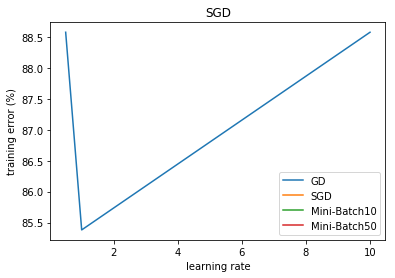

In [60]:
plt.plot(inputsGD, outputsGD, label='GD')
plt.plot(inputsSGD, outputsSGD, label='SGD')
plt.plot(inputsMiniBatch10, outputsMiniBatch10, label='Mini-Batch10')
plt.plot(inputsMiniBatch50, outputsMiniBatch50, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.ylabel('training error (%)')
plt.title("SGD")
plt.legend()
plt.show()

In [61]:
# Limpar os arrays para testar outro features.
clear_arrays()

In [ ]:
# GD, un = 25.
use_model(0.5, 25, 'gd')

In [ ]:
# GD, un = 50.
use_model(0.5, 50, 'gd')

In [ ]:
# GD, un = 100.
use_model(0.5, 100, 'gd')

In [29]:
# SGD, un = 25.
use_model(0.5, 25, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 57s 11ms/step - loss: 3.0628 - acc: 0.0952 - val_loss: 4.3682 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 55s 11ms/step - loss: 4.2272 - acc: 0.1090 - val_loss: 4.6007 - val_acc: 0.1096
Epoch 3/10
5000/5000 [==============================] - 61s 12ms/step - loss: 4.3486 - acc: 0.1392 - val_loss: 4.2151 - val_acc: 0.1746
Epoch 4/10
5000/5000 [==============================] - 59s 12ms/step - loss: 5.1659 - acc: 0.0998 - val_loss: 5.4696 - val_acc: 0.0920
Epoch 5/10
5000/5000 [==============================] - 66s 13ms/step - loss: 5.4324 - acc: 0.0984 - val_loss: 5.8436 - val_acc: 0.0978
Epoch 6/10
5000/5000 [==============================] - 58s 12ms/step - loss: 5.3815 - acc: 0.1070 - val_loss: 5.3819 - val_acc: 0.0978
Epoch 7/10
5000/5000 [==============================] - 46s 9ms/step - loss: 5.1725 - acc: 0.0948 - val_loss: 5.2810 - val_acc: 0.0912
E

In [30]:
# SGD, un = 50.
use_model(0.5, 50, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 61s 12ms/step - loss: 4.5210 - acc: 0.1634 - val_loss: 14.4949 - val_acc: 0.1000
Epoch 2/10
5000/5000 [==============================] - 57s 11ms/step - loss: 14.6372 - acc: 0.0916 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 3/10
5000/5000 [==============================] - 59s 12ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 4/10
5000/5000 [==============================] - 59s 12ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 5/10
5000/5000 [==============================] - 60s 12ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 6/10
5000/5000 [==============================] - 63s 13ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 7/10
5000/5000 [==============================] - 56s 11ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val

In [31]:
# SGD, un = 100.
use_model(0.5, 100, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 60s 12ms/step - loss: 14.5066 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
5000/5000 [==============================] - 61s 12ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
5000/5000 [==============================] - 60s 12ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
5000/5000 [==============================] - 63s 13ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
5000/5000 [==============================] - 57s 11ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
5000/5000 [==============================] - 63s 13ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
5000/5000 [==============================] - 53s 11ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - va

In [32]:
# MB50, un = 25.
use_model(0.5, 25, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 7s 1ms/step - loss: 1.6105 - acc: 0.4016 - val_loss: 0.6713 - val_acc: 0.7810
Epoch 2/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.6480 - acc: 0.7800 - val_loss: 0.4626 - val_acc: 0.8454
Epoch 3/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.4754 - acc: 0.8426 - val_loss: 0.3620 - val_acc: 0.8842
Epoch 4/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.3981 - acc: 0.8784 - val_loss: 0.3266 - val_acc: 0.9008
Epoch 5/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.3429 - acc: 0.8952 - val_loss: 0.2771 - val_acc: 0.9102
Epoch 6/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2874 - acc: 0.9110 - val_loss: 0.2853 - val_acc: 0.9080
Epoch 7/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2498 - acc: 0.9194 - val_loss: 0.2461 - val_acc: 0.9224
Epoch 8/10
500

In [33]:
# MB50, un = 50.
use_model(0.5, 50, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 8s 2ms/step - loss: 1.5851 - acc: 0.4200 - val_loss: 0.8161 - val_acc: 0.6978
Epoch 2/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.6366 - acc: 0.7922 - val_loss: 0.5489 - val_acc: 0.8156
Epoch 3/10
5000/5000 [==============================] - 5s 989us/step - loss: 0.4413 - acc: 0.8636 - val_loss: 0.3171 - val_acc: 0.9008
Epoch 4/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.3575 - acc: 0.8842 - val_loss: 0.2446 - val_acc: 0.9252
Epoch 5/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2843 - acc: 0.9050 - val_loss: 0.2688 - val_acc: 0.9136
Epoch 6/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.2431 - acc: 0.9210 - val_loss: 0.1769 - val_acc: 0.9456
Epoch 7/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.1955 - acc: 0.9360 - val_loss: 0.1907 - val_acc: 0.9340
Epoch 8/10
5

In [34]:
# MB50, un = 100.
use_model(0.5, 100, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 9s 2ms/step - loss: 14.3297 - acc: 0.1014 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 2/10
5000/5000 [==============================] - 8s 2ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 3/10
5000/5000 [==============================] - 10s 2ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 4/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 5/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 6/10
5000/5000 [==============================] - 8s 2ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024
Epoch 7/10
5000/5000 [==============================] - 8s 2ms/step - loss: 14.4676 - acc: 0.1024 - val_loss: 14.4676 - val_acc: 0.1024

In [35]:
# MB50, un = 25.
use_model(0.5, 25, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 4s 750us/step - loss: 2.2464 - acc: 0.1606 - val_loss: 2.0620 - val_acc: 0.3072
Epoch 2/10
5000/5000 [==============================] - 2s 328us/step - loss: 1.5587 - acc: 0.4654 - val_loss: 1.3489 - val_acc: 0.4890
Epoch 3/10
5000/5000 [==============================] - 2s 430us/step - loss: 0.9578 - acc: 0.6870 - val_loss: 0.7714 - val_acc: 0.7428
Epoch 4/10
5000/5000 [==============================] - 2s 364us/step - loss: 0.7112 - acc: 0.7712 - val_loss: 0.6449 - val_acc: 0.7960
Epoch 5/10
5000/5000 [==============================] - 1s 285us/step - loss: 0.5709 - acc: 0.8222 - val_loss: 0.4862 - val_acc: 0.8556
Epoch 6/10
5000/5000 [==============================] - 1s 289us/step - loss: 0.4801 - acc: 0.8530 - val_loss: 0.4136 - val_acc: 0.8766
Epoch 7/10
5000/5000 [==============================] - 1s 276us/step - loss: 0.4261 - acc: 0.8710 - val_loss: 0.3768 - val_acc: 0.8814


In [36]:
# MB50, un = 50.
use_model(0.5, 50, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 3s 586us/step - loss: 2.1756 - acc: 0.2018 - val_loss: 1.8447 - val_acc: 0.3792
Epoch 2/10
5000/5000 [==============================] - 2s 344us/step - loss: 1.2968 - acc: 0.5442 - val_loss: 0.9392 - val_acc: 0.6816
Epoch 3/10
5000/5000 [==============================] - 1s 297us/step - loss: 0.7635 - acc: 0.7514 - val_loss: 0.5944 - val_acc: 0.8040
Epoch 4/10
5000/5000 [==============================] - 2s 400us/step - loss: 0.5836 - acc: 0.8108 - val_loss: 0.5335 - val_acc: 0.8284
Epoch 5/10
5000/5000 [==============================] - 2s 398us/step - loss: 0.4965 - acc: 0.8392 - val_loss: 0.4160 - val_acc: 0.8766
Epoch 6/10
5000/5000 [==============================] - 2s 412us/step - loss: 0.4346 - acc: 0.8644 - val_loss: 0.3628 - val_acc: 0.8874
Epoch 7/10
5000/5000 [==============================] - 2s 324us/step - loss: 0.3844 - acc: 0.8808 - val_loss: 0.3442 - val_acc: 0.8940


In [37]:
# MB50, un = 100.
use_model(0.5, 100, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 482us/step - loss: 2.1511 - acc: 0.2082 - val_loss: 2.1175 - val_acc: 0.1968
Epoch 2/10
5000/5000 [==============================] - 2s 321us/step - loss: 1.2295 - acc: 0.5652 - val_loss: 0.7629 - val_acc: 0.7528
Epoch 3/10
5000/5000 [==============================] - 2s 330us/step - loss: 0.7127 - acc: 0.7582 - val_loss: 0.5545 - val_acc: 0.8108
Epoch 4/10
5000/5000 [==============================] - 2s 389us/step - loss: 0.5623 - acc: 0.8192 - val_loss: 0.5965 - val_acc: 0.7838
Epoch 5/10
5000/5000 [==============================] - 2s 350us/step - loss: 0.4828 - acc: 0.8442 - val_loss: 0.5299 - val_acc: 0.8160
Epoch 6/10
5000/5000 [==============================] - 2s 340us/step - loss: 0.4169 - acc: 0.8646 - val_loss: 0.3354 - val_acc: 0.8970
Epoch 7/10
5000/5000 [==============================] - 2s 338us/step - loss: 0.3809 - acc: 0.8804 - val_loss: 0.3212 - val_acc: 0.9002


In [ ]:
plt.plot(inputsGD, outputsGD, label='GD')
plt.plot(inputsSGD, outputsSGD, label='SGD')
plt.plot(inputsMiniBatch10, outputsMiniBatch10, label='Mini-Batch10')
plt.plot(inputsMiniBatch50, outputsMiniBatch50, label='Mini-Batch50')
plt.xlabel('Hidden layer unities (25, 50, 100)')
plt.ylabel('training error (%)')
plt.title("SGD")
plt.legend()
plt.show()